# Import all the required libraries

---



In [6]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [7]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [8]:
data = load_data('TCS.NS')
df=data
df.head()

/tmp/ipython-input-7-1794888428.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,300.614197,303.513755,299.574341,301.873990,1963682
1,2010-01-05,300.694153,303.773688,298.574481,301.953971,2014488
2,2010-01-06,293.895233,300.834191,293.155356,300.694198,3349176
3,2010-01-07,285.716522,295.715000,284.356719,294.155228,6474892
4,2010-01-08,279.877319,287.356184,278.557525,286.356336,6048178


Visualizing Closing Price

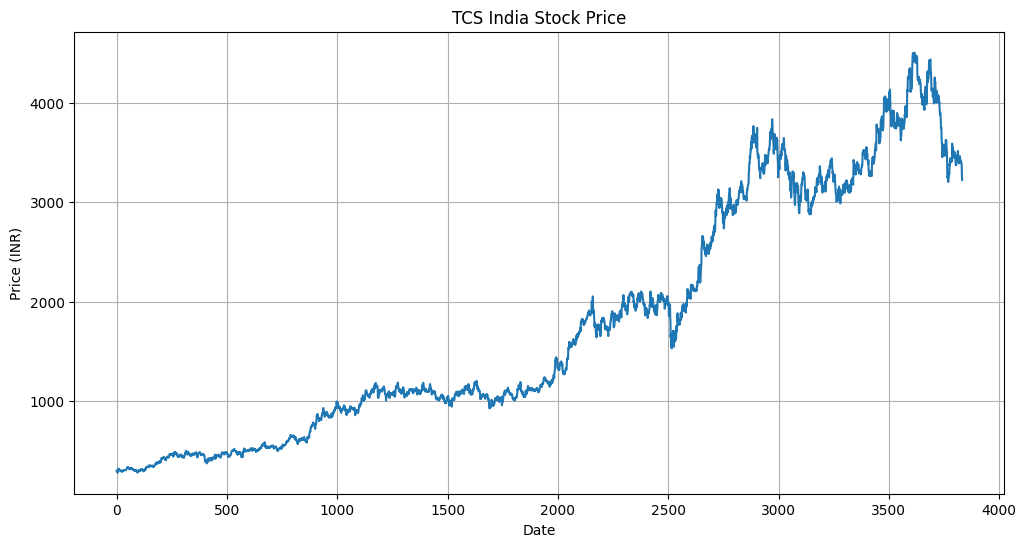

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [10]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,300.614197,303.513755,299.574341,301.873990,1963682
1,2010-01-05,300.694153,303.773688,298.574481,301.953971,2014488
2,2010-01-06,293.895233,300.834191,293.155356,300.694198,3349176
3,2010-01-07,285.716522,295.715000,284.356719,294.155228,6474892
4,2010-01-08,279.877319,287.356184,278.557525,286.356336,6048178
...,...,...,...,...,...,...
3828,2025-07-08,3406.199951,3425.000000,3393.399902,3405.000000,2325242
3829,2025-07-09,3383.800049,3414.000000,3367.000000,3410.000000,2034938
3830,2025-07-10,3382.000000,3399.000000,3356.000000,3380.000000,3035012


# Plotting moving averages of 100 day

---



In [11]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3828,3488.480374
3829,3482.304531
3830,3476.838220
3831,3470.344731


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

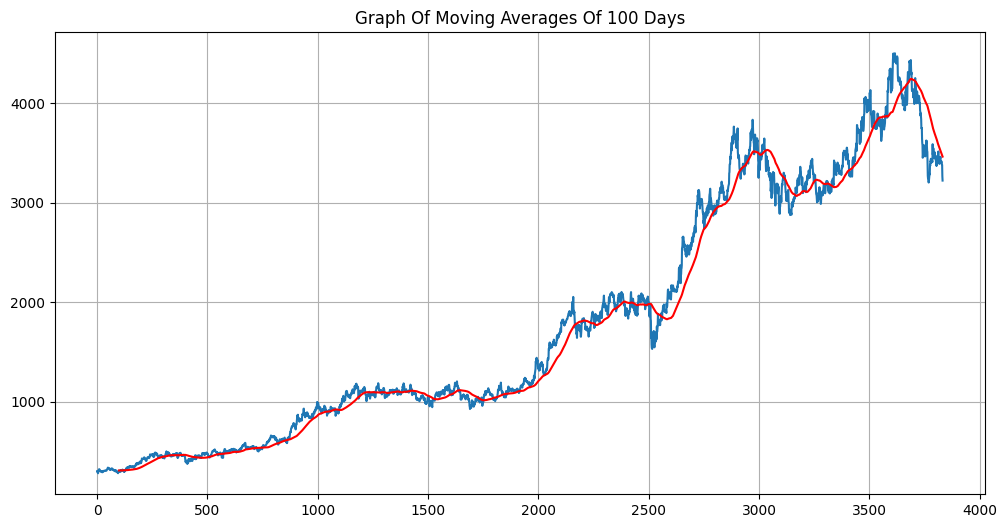

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [13]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3828,3817.523416
3829,3812.955536
3830,3808.625851
3831,3803.771783


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

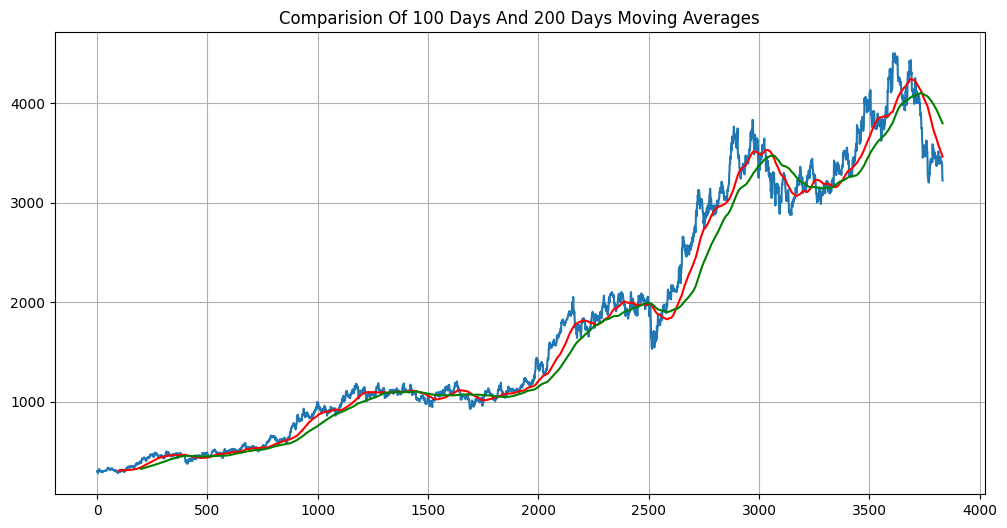

In [14]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [15]:
df.shape

(3833, 6)

# Spliting the dataset into training (70%) and testing (30%) set

In [16]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2683, 6)
(1150, 6)


In [17]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,300.614197,303.513755,299.574341,301.873990,1963682
1,2010-01-05,300.694153,303.773688,298.574481,301.953971,2014488
2,2010-01-06,293.895233,300.834191,293.155356,300.694198,3349176
3,2010-01-07,285.716522,295.715000,284.356719,294.155228,6474892
4,2010-01-08,279.877319,287.356184,278.557525,286.356336,6048178


In [18]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2683,2020-11-18,2478.623291,2514.057182,2460.128000,2511.037566,2893762
2684,2020-11-19,2488.295654,2525.333694,2482.586790,2488.390111,4167501
2685,2020-11-20,2510.330322,2525.192723,2479.473193,2505.376189,2711471
2686,2020-11-23,2570.722900,2576.148855,2514.811977,2538.403084,3706418
2687,2020-11-24,2568.647461,2588.416766,2552.558277,2580.301332,3120516


# Using MinMax scaler for normalization of the dataset

---



In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [21]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00846441],
       [0.00849773],
       [0.00797289],
       ...,
       [0.92677795],
       [0.93550534],
       [0.94220883]])

In [22]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
x_train.shape

(2583, 100, 1)

# ML Model (LSTM)

---



In [24]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [25]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [28]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - loss: 0.0082 - mean_absolute_error: 0.0609
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0047 - mean_absolute_error: 0.0469
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0044 - mean_absolute_error: 0.0460
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0033 - mean_absolute_error: 0.0392
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0033 - mean_absolute_error: 0.0395
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0033 - mean_absolute_error: 0.0392
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0027 - mean_absolute_error: 0.0359
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0029 - mean_absolute_error: 0.0356
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0026 - mean_absolute_error: 0.0342
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0024 - mean_absolute_error: 0.0335


In [29]:
model.save('keras_model.h5')

In [30]:
test_close.shape

(1150, 1)

In [31]:
past_100_days = pd.DataFrame(train_close[-100:])

In [32]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [34]:
final_df = pd.concat([past_100_days, test_df], ignore_index = True)

In [35]:
final_df.head()

,0
0,1968.823593
1,1949.791590
2,1970.698719
3,2028.497759
4,2067.264612


In [36]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00739149],
       [0.        ],
       [0.00811973],
       ...,
       [0.55545204],
       [0.52434345],
       [0.5111777 ]])

In [37]:
input_data.shape

(1250, 1)

# Testing the model

---



In [38]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1150, 100, 1)
(1150,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [40]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step


In [41]:
y_pred.shape

(1150, 1)

In [42]:
y_test

array([0.21797188, 0.20917626, 0.21577317, ..., 0.55545204, 0.52434345,
       0.5111777 ])

In [43]:
y_pred

array([[0.23592786],
       [0.23581299],
       [0.23565744],
       ...,
       [0.5666076 ],
       [0.5660722 ],
       [0.5651581 ]], dtype=float32)

In [44]:
scaler.scale_

array([0.00038837])

In [45]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

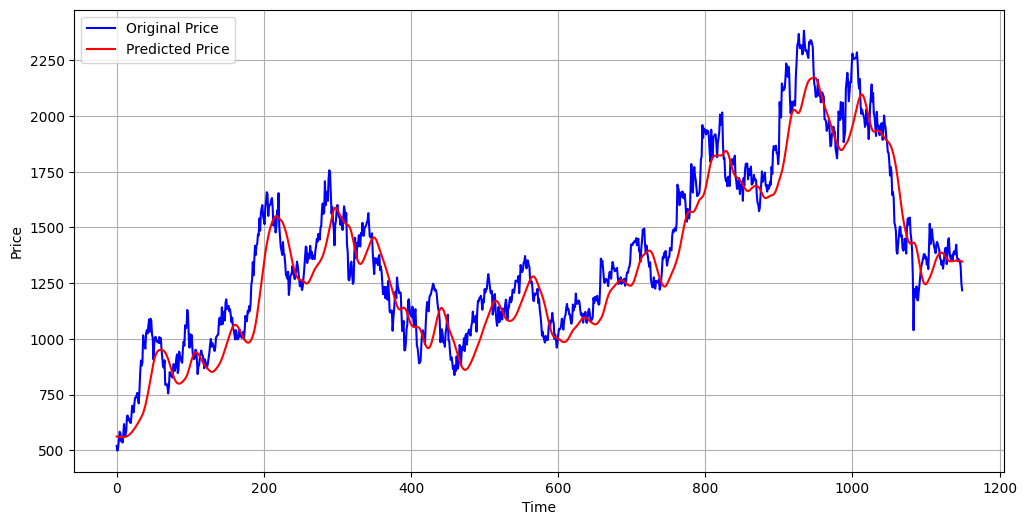

In [46]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [47]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 7.65%


Calculation of R2 score

In [48]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8816820440613965


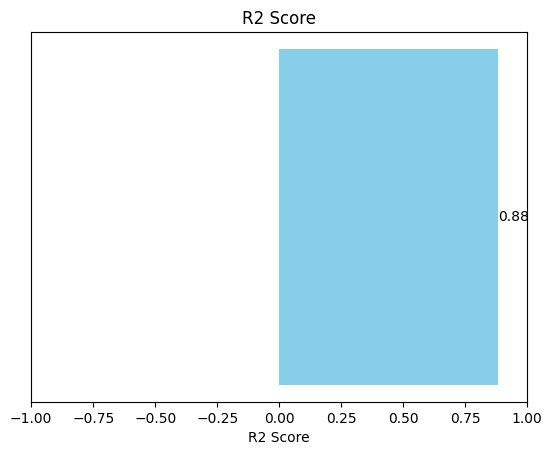

In [49]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

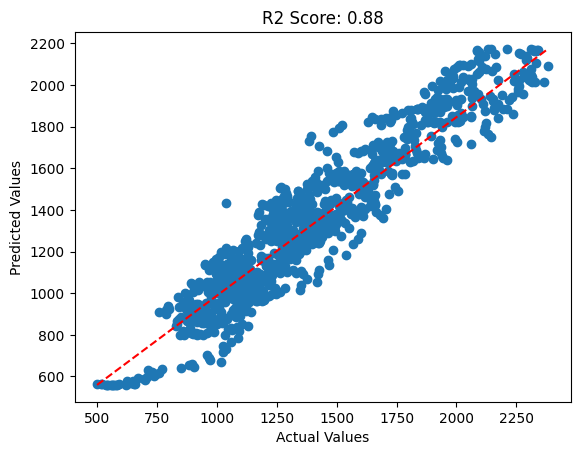

In [50]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()